In [1]:
%%HTML
<style type="text/css">
    .tasks { color: red; }
    .task { color: blue; }
    .example { color: green; }
</style>

In [2]:
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sns.set()

warnings.filterwarnings('ignore')
np.set_printoptions(precision=3, suppress=True)

pd.set_option('max_rows', 150)

%matplotlib inline

<br><br>

<h2 class="example">Working with Log Files</h2>

<br>

We are reading the log file in our student files folder called new_access.log.  We format the req_date column to be a Python Datetime object.  We perform some groupby operations (on the addr and browser columns, for example).  Then we examine the locations of the IP addresses using pygeoip.  This must be installed (it is not in Anaconda).

```python
pip install pygeoip, or pip3 install pygeoip, or pip3.7 install pygeoip (etc.)
```
pygeoip uses a data file (called geocitylite.dat in the student_files/resources folder).
We apply a function to all cells in the addr column which does a lookup into the pygeoip data file to find the latitude, longitude, city, and country info for that IP address.

We then plot information about countries and cities related to that file.  To plot the city locations, we used another 3rd party tool, called gmplot.  This tool is for development purposes but must also be installed.  
```python 
pip install gmplot
```


In [4]:
log = pd.read_csv('../resources/new_access.log', usecols=(0, 3, 5, 6, 7, 9), sep='\s+',
                  names=['addr', 'req_date', 'request', 'status', 'size', 'browser'], 
                  error_bad_lines=False)
log.shape

(463915, 6)

In [5]:
log.head()

,addr,req_date,request,status,size,browser
0,109.169.248.247,[12/Dec/2015:18:25:11,GET /administrator/ HTTP/1.1,200,4263,Mozilla/5.0 (Windows NT 6.0; rv:34.0) Gecko/20...
1,109.169.248.247,[12/Dec/2015:18:25:11,POST /administrator/index.php HTTP/1.1,200,4494,Mozilla/5.0 (Windows NT 6.0; rv:34.0) Gecko/20...
2,46.72.177.4,[12/Dec/2015:18:31:08,GET /administrator/ HTTP/1.1,200,4263,Mozilla/5.0 (Windows NT 6.0; rv:34.0) Gecko/20...
3,46.72.177.4,[12/Dec/2015:18:31:08,POST /administrator/index.php HTTP/1.1,200,4494,Mozilla/5.0 (Windows NT 6.0; rv:34.0) Gecko/20...
4,83.167.113.100,[12/Dec/2015:18:31:25,GET /administrator/ HTTP/1.1,200,4263,Mozilla/5.0 (Windows NT 6.0; rv:34.0) Gecko/20...


In [6]:
log.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 463915 entries, 0 to 463914
Data columns (total 6 columns):
addr        463915 non-null object
req_date    463915 non-null object
request     463915 non-null object
status      463915 non-null int64
size        463914 non-null object
browser     463860 non-null object
dtypes: int64(1), object(5)
memory usage: 21.2+ MB


In [7]:
log.req_date = pd.to_datetime(log.req_date, format='[%d/%b/%Y:%H:%M:%S')
log.head()

,addr,req_date,request,status,size,browser
0,109.169.248.247,2015-12-12 18:25:11,GET /administrator/ HTTP/1.1,200,4263,Mozilla/5.0 (Windows NT 6.0; rv:34.0) Gecko/20...
1,109.169.248.247,2015-12-12 18:25:11,POST /administrator/index.php HTTP/1.1,200,4494,Mozilla/5.0 (Windows NT 6.0; rv:34.0) Gecko/20...
2,46.72.177.4,2015-12-12 18:31:08,GET /administrator/ HTTP/1.1,200,4263,Mozilla/5.0 (Windows NT 6.0; rv:34.0) Gecko/20...
3,46.72.177.4,2015-12-12 18:31:08,POST /administrator/index.php HTTP/1.1,200,4494,Mozilla/5.0 (Windows NT 6.0; rv:34.0) Gecko/20...
4,83.167.113.100,2015-12-12 18:31:25,GET /administrator/ HTTP/1.1,200,4263,Mozilla/5.0 (Windows NT 6.0; rv:34.0) Gecko/20...


In [8]:
log.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 463915 entries, 0 to 463914
Data columns (total 6 columns):
addr        463915 non-null object
req_date    463915 non-null datetime64[ns]
request     463915 non-null object
status      463915 non-null int64
size        463914 non-null object
browser     463860 non-null object
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 21.2+ MB


In [9]:
top10_addr = log.groupby('addr').size().sort_values(ascending=False).head(10)
top10_addr

addr
149.56.83.40       62178
205.167.170.15     33302
134.249.53.185     17904
192.227.172.158    13474
195.154.216.79     10996
195.154.215.241     7705
41.75.96.130        5664
190.57.154.101      5662
154.0.14.250        5659
37.1.206.196        3780
dtype: int64

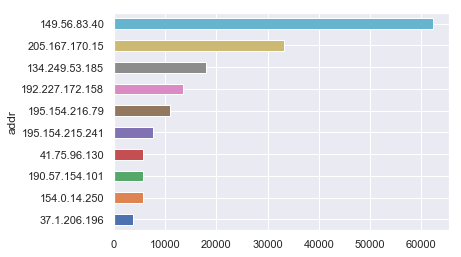

In [10]:
top10_addr[::-1].plot(kind='barh');

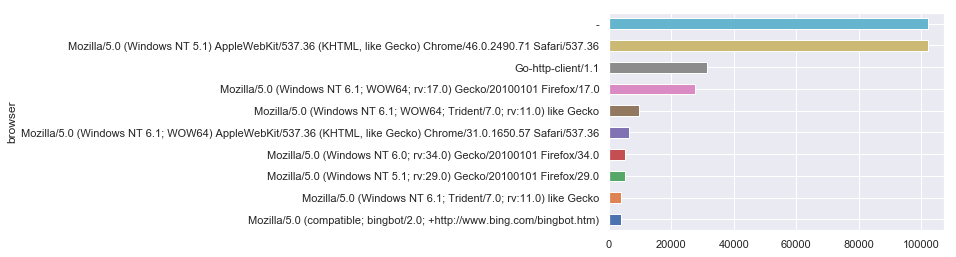

In [11]:
log.groupby('browser').size().sort_values(ascending=False).head(10)[::-1].plot(kind='barh');

In [12]:
log['http-method'] = log.request.apply(lambda s: s.split()[0])
log.head()

,addr,req_date,request,status,size,browser,http-method
0,109.169.248.247,2015-12-12 18:25:11,GET /administrator/ HTTP/1.1,200,4263,Mozilla/5.0 (Windows NT 6.0; rv:34.0) Gecko/20...,GET
1,109.169.248.247,2015-12-12 18:25:11,POST /administrator/index.php HTTP/1.1,200,4494,Mozilla/5.0 (Windows NT 6.0; rv:34.0) Gecko/20...,POST
2,46.72.177.4,2015-12-12 18:31:08,GET /administrator/ HTTP/1.1,200,4263,Mozilla/5.0 (Windows NT 6.0; rv:34.0) Gecko/20...,GET
3,46.72.177.4,2015-12-12 18:31:08,POST /administrator/index.php HTTP/1.1,200,4494,Mozilla/5.0 (Windows NT 6.0; rv:34.0) Gecko/20...,POST
4,83.167.113.100,2015-12-12 18:31:25,GET /administrator/ HTTP/1.1,200,4263,Mozilla/5.0 (Windows NT 6.0; rv:34.0) Gecko/20...,GET


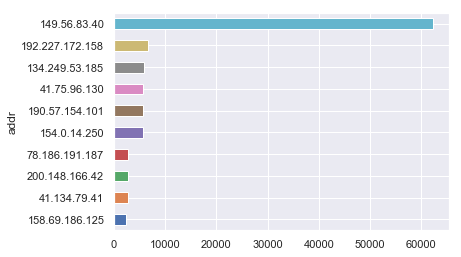

In [13]:
top10_POSTS = log[log['http-method'] == 'POST'].groupby('addr').size().sort_values(ascending=False).head(10)
top10_POSTS[::-1].plot(kind='barh');

In [14]:
import pygeoip
GEOIP = pygeoip.GeoIP('../resources/GeoLiteCity.dat')
GEOIP.record_by_addr('149.56.83.40')

{'dma_code': 0,
 'area_code': 0,
 'metro_code': None,
 'postal_code': 'H3A',
 'country_code': 'CA',
 'country_code3': 'CAN',
 'country_name': 'Canada',
 'continent': 'NA',
 'region_code': 'QC',
 'city': 'Montréal',
 'latitude': 45.50399999999999,
 'longitude': -73.5747,
 'time_zone': 'America/Montreal'}

In [15]:
def get_location(addr):
    results = ['', '', 0, 0]
    try:
        info = GEOIP.record_by_addr(addr)
        if info:
            results = [info.get('country_name'), info.get('city'), info.get('latitude'), info.get('longitude')]
    except pygeoip.GeoIPError:
        pass
    
    return results

In [16]:
results = log.addr.map(get_location)

In [17]:
new_df = pd.DataFrame(results.values.tolist(), columns=['country', 'city', 'latitude', 'longitude'])
new_df.head()

,country,city,latitude,longitude
0,Russian Federation,Chapaevsk,52.9781,49.7197
1,Russian Federation,Chapaevsk,52.9781,49.7197
2,Russian Federation,Kursk,51.8830,36.2659
3,Russian Federation,Kursk,51.8830,36.2659
4,Russian Federation,Moscow,55.7522,37.6156


In [18]:
merged = pd.concat([log, new_df])
merged.head()

,addr,browser,city,country,http-method,latitude,longitude,req_date,request,size,status
0,109.169.248.247,Mozilla/5.0 (Windows NT 6.0; rv:34.0) Gecko/20...,NaN,NaN,GET,NaN,NaN,2015-12-12 18:25:11,GET /administrator/ HTTP/1.1,4263,200.0
1,109.169.248.247,Mozilla/5.0 (Windows NT 6.0; rv:34.0) Gecko/20...,NaN,NaN,POST,NaN,NaN,2015-12-12 18:25:11,POST /administrator/index.php HTTP/1.1,4494,200.0
2,46.72.177.4,Mozilla/5.0 (Windows NT 6.0; rv:34.0) Gecko/20...,NaN,NaN,GET,NaN,NaN,2015-12-12 18:31:08,GET /administrator/ HTTP/1.1,4263,200.0
3,46.72.177.4,Mozilla/5.0 (Windows NT 6.0; rv:34.0) Gecko/20...,NaN,NaN,POST,NaN,NaN,2015-12-12 18:31:08,POST /administrator/index.php HTTP/1.1,4494,200.0
4,83.167.113.100,Mozilla/5.0 (Windows NT 6.0; rv:34.0) Gecko/20...,NaN,NaN,GET,NaN,NaN,2015-12-12 18:31:25,GET /administrator/ HTTP/1.1,4263,200.0


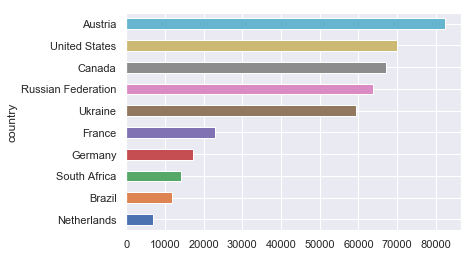

In [19]:
top10_countries = merged.groupby('country').size().sort_values(ascending=False).head(10)
top10_countries[::-1].plot(kind='barh');

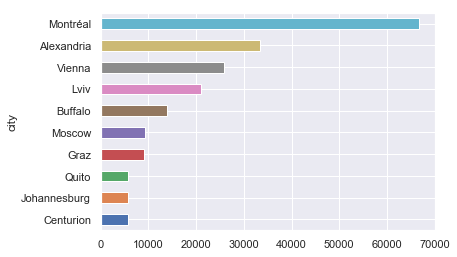

In [22]:
top10_cities = merged.groupby('city').size().sort_values(ascending=False).head(10)
top10_cities[::-1].plot(kind='barh');

In [23]:
from gmplot import GoogleMapPlotter
lats, longs = [], []
for city in top10_cities.index:
    latitude = merged.loc[city == merged['city'], 'latitude']
    longitude = merged.loc[city == merged['city'], 'longitude']
    lats.append(latitude.iloc[0])
    longs.append(longitude.iloc[0])

g_map = GoogleMapPlotter(37, 95, 3)
g_map.heatmap(lats, longs, radius=20)
g_map.draw('results.html')                  # this will be generated and placed into the student files